In [1]:
# Importing basic libraries 

import numpy as np 
# to read csv files
import pandas as pd 
#Performance Plot
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn import metrics
%matplotlib inline


In [2]:
#Loading a train.csv file in a variable name Train and make a copy of it into another variable df
Train=pd.read_csv('Train.csv')
#Loading a Test.csv file in a variable name Test and make a copy of it into another variable df2

Test=pd.read_csv('Test.csv')
df=Train.copy()
df2=Test.copy()
df.shape

(8523, 12)

In [3]:
#Sample dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Print a summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Print a statistical summary of the dataset.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# This code will count the number of null values in a dataframe.
# It uses the isnull() method to create a boolean mask of null values
# and then sums up the True values to get the count.

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [8]:
# This code counts the number of null values in each column of a pandas DataFrame
df.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Display the count of each unique value in the 'Outlet_Size' column.
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
# Find the mode of variable 'Outlet_Size'
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [11]:
# Fill missing values in the "Outlet Size" column with the mode value.
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [12]:
# Counts the number of null values in each column of the DataFrame

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
#Removing dupilite values
df.drop_duplicates(keep='first',inplace=True)
#Renamimg some columns
df.rename(columns={'Item_Identifier': 'Identifier', 'Item_Weight': 'Weight','Item_Fat_Content':'Fat_Content', 'Item_MRP': 'MRP', 'Outlet_Establishment_Year': 'Year', 'Outlet_Location_Type': 'Location', 'Item_Outlet_Sales': 'Sales'}, inplace=True)
#Replaceing by standard names
df = df.replace(['low fat','reg','LF'],['Low Fat','Regular','Low Fat'])


In [14]:

df.head(5)

,Identifier,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Outlet_Identifier,Year,Outlet_Size,Location,Outlet_Type,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
#Finding outlet age and creating a column
#As this dataset is collected in 2013 so we find the difference between 2013 and Outlet_Establishment_Year
df['Outlet_Age'] = df['Year'].apply(lambda x: 2013 - x) 

In [16]:
df.head()

,Identifier,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Outlet_Identifier,Year,Outlet_Size,Location,Outlet_Type,Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


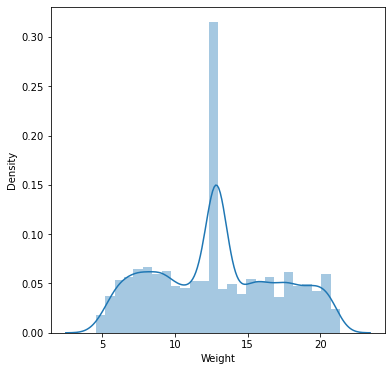

In [17]:
# Display the distribution of Item_Weight
plt.figure(figsize=(6,6))
sns.distplot(df['Weight'])
plt.show()

/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


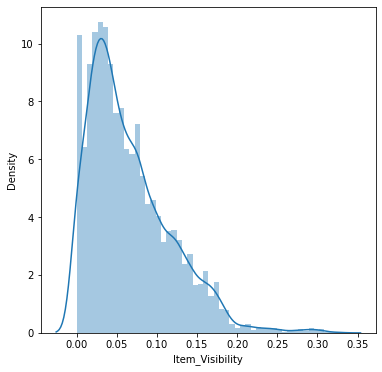

In [18]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


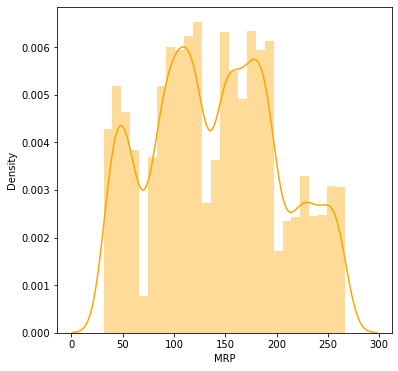

In [19]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['MRP'], color='orange')
plt.show()

/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


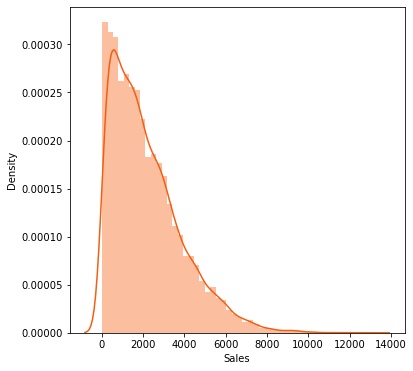

In [20]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Sales'],color='#F55E11')
plt.show()

/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


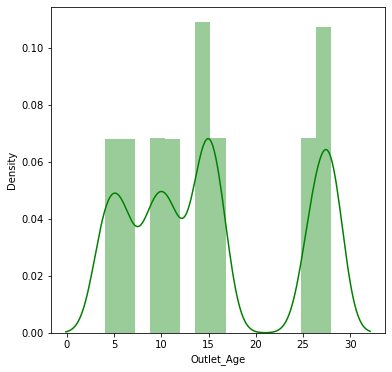

In [21]:
# Outlet Age distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Outlet_Age'], color='green')
plt.show()

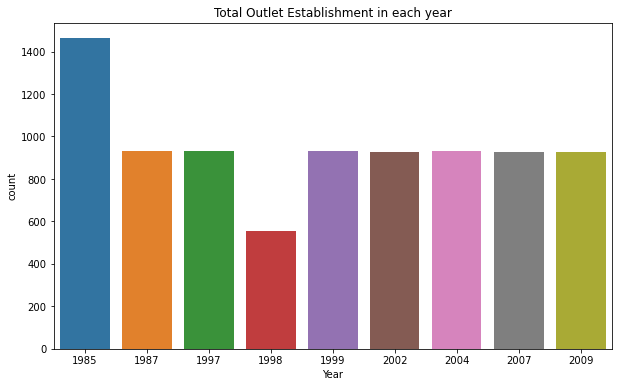

In [22]:
# To find total Outlet Establishment in each year
plt.figure(figsize=(10,6))
sns.countplot(x='Year', data=df)
plt.title("Total Outlet Establishment in each year")
plt.show()

/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fat_Content', ylabel='count'>

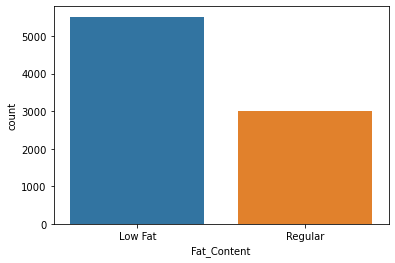

In [23]:
#To know Fat content count
sns.countplot(df["Fat_Content"])

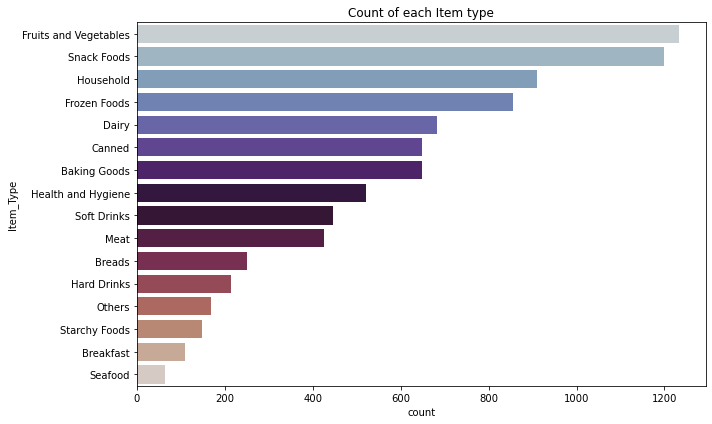

In [24]:
#Count of Item type
plt.figure(figsize=(10,6))
sns.countplot(y="Item_Type",data=df,palette='twilight',order = df['Item_Type'].value_counts().index)
plt.title("Count of each Item type")
plt.tight_layout()
plt.show()

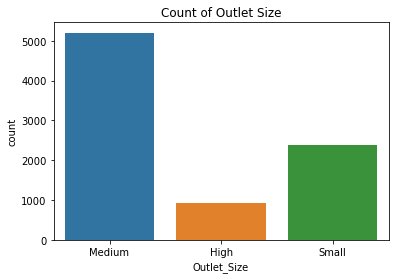

In [25]:
#Count of outlet size
sns.countplot(x='Outlet_Size', data=df)
plt.title("Count of Outlet Size")
plt.show()

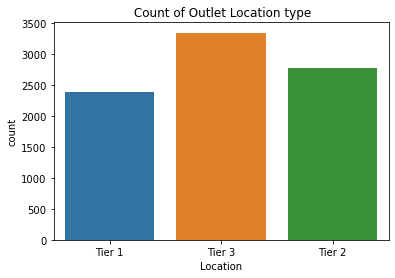

In [26]:
#Count of Outlet_Location_Type
sns.countplot(x='Location', data=df)
plt.title(" Count of Outlet Location type")
plt.show()

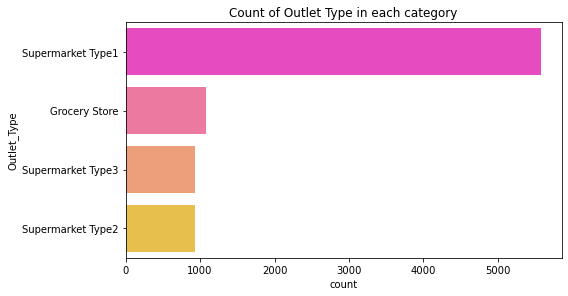

In [27]:
#Count of Outlet type
plt.figure(figsize=(8,4))
sns.countplot(y="Outlet_Type",data=df,palette='spring',
                           order = df['Outlet_Type'].value_counts().index)
plt.tight_layout()
plt.title("Count of Outlet Type in each category")
plt.show()

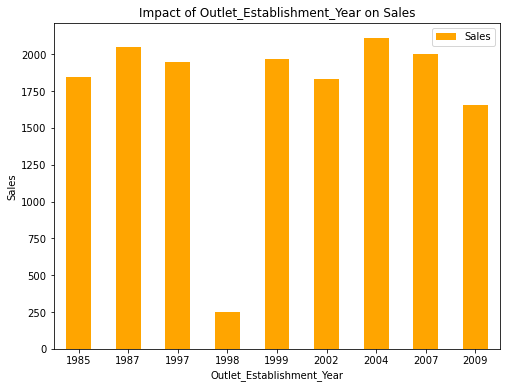

In [28]:
#Sum of Outlet Establishment year Sales
Outlet_Establishment_Year_pivot = \
df.pivot_table(index='Year', values="Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='orange',figsize=(8,6))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sales")
plt.title("Impact of Outlet_Establishment_Year on Sales")
plt.xticks(rotation=0)
plt.show()

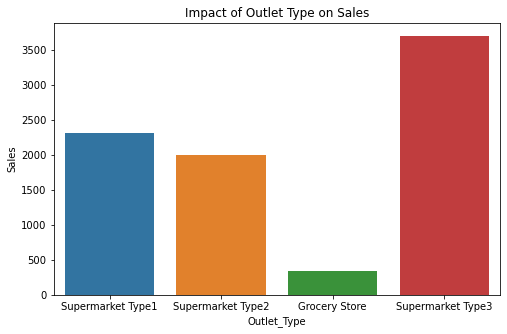

In [29]:

plt.figure(figsize=(8,5))
sns.barplot(x = 'Outlet_Type', y = 'Sales', data = df,ci=None)
plt.title("Impact of Outlet Type on Sales")
plt.show()

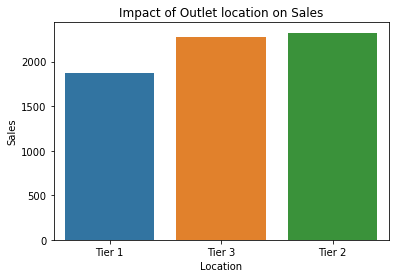

In [30]:
sns.barplot(x = 'Location', y = 'Sales', data = df,ci=None)
plt.title("Impact of Outlet location on Sales")
plt.show()

/var/folders/n4/63cjdnzj0fl2rgbmzchvf8740000gp/T/ipykernel_3525/2560812027.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

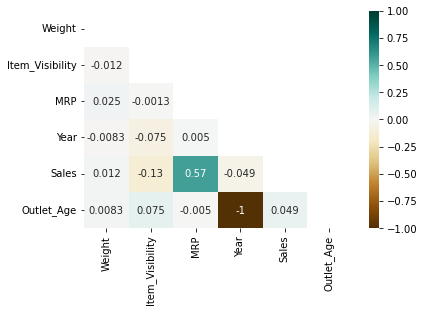

In [31]:

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

**Label Encoding**

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
#Converting categorical value into numeric
df['Fat_Content']= le.fit_transform(df['Fat_Content'])
df['Item_Type']= le.fit_transform(df['Item_Type'])
df['Outlet_Size']= le.fit_transform(df['Outlet_Size'])
df['Location']= le.fit_transform(df['Location'])
df['Outlet_Type']= le.fit_transform(df['Outlet_Type'])

In [34]:
#Droping some columns
df.drop(['Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [35]:
df

,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Year,Outlet_Size,Location,Outlet_Type,Sales,Outlet_Age
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,14
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228,4
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,14
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800,15
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834,26
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850,11
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136,9
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976,4


**Splitting dataset into train and test**

In [36]:
X=df.drop('Outlet_Age',axis=1)


In [37]:
X

,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Year,Outlet_Size,Location,Outlet_Type,Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [38]:
# Spliting into dependent and independent variable
X=X.drop('Sales',axis=1)
Y=df['Sales']

In [39]:
X

,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Year,Outlet_Size,Location,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,1,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [40]:
#Splitting dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=45, test_size=0.2)

In [41]:
X_train.columns

Index(['Weight', 'Fat_Content', 'Item_Visibility', 'Item_Type', 'MRP', 'Year',
       'Outlet_Size', 'Location', 'Outlet_Type'],
      dtype='object')

In [42]:
X.describe()

,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Year,Outlet_Size,Location,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [43]:
features = ['Weight', 'Fat_Content', 'Item_Visibility', 'Item_Type',
       'MRP', 'Outlet_Size', 'Location', 'Outlet_Type']

# MODELS

### Linear Regression

In [44]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr= LinearRegression()

In [45]:
lr.fit(X_train,Y_train)

LinearRegression()

In [46]:
lr_accuracy = round(lr.score(X_train,Y_train) * 100,2)
lr_accuracy

50.73

In [47]:
Y_pred_lr=lr.predict(X_test)

In [48]:
print('R Squared value = ',r2_score(Y_test,Y_pred_lr))
print('Mean absolute error = ',mean_absolute_error(Y_test,Y_pred_lr))
print('RMSE = ',np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

R Squared value =  0.5099806500245707
Mean absolute error =  917.6305043061157
RMSE =  1215.7387016494165


In [49]:
joblib.dump(lr,r'/Users/rajatmaloo/Documents/Internship/Week 4/models/lr.sav')


['/Users/rajatmaloo/Documents/Internship/Week 4/models/lr.sav']

### Decision Tree Regressor 

In [50]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [51]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([4142.1917515 , 1848.07194327,  475.89114227, ..., 2796.24327951,
       2392.2034048 , 2796.24327951])

In [52]:
dt_accuracy = round(dt.score(X_train,Y_train),2)
dt_accuracy

0.58

In [53]:
print('R Squared value = ',r2_score(Y_test,y_pred_dt))
print('Mean absolute error = ',mean_absolute_error(Y_test,y_pred_dt))
print('RMSE = ',np.sqrt(mean_squared_error(Y_test,y_pred_dt)))

R Squared value =  0.5903695619095377
Mean absolute error =  787.1276881395719
RMSE =  1111.551879181661


In [54]:
joblib.dump(dt,r'/Users/rajatmaloo/Documents/Internship/Week 4/models/dt.sav')


['/Users/rajatmaloo/Documents/Internship/Week 4/models/dt.sav']

### Random Forest Regressor

In [55]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [56]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([3942.07294974, 1403.47683196,  597.76907333, ..., 2658.89152789,
       1797.72432443, 2792.3316693 ])

In [57]:
rf_accuracy = round(rf.score(X_train,Y_train),2)
rf_accuracy

0.61

In [58]:
print('R Squared value = ',r2_score(Y_test,y_pred_rf))
print('Mean absolute error = ',mean_absolute_error(Y_test,y_pred_rf))
print('RMSE = ',np.sqrt(mean_squared_error(Y_test,y_pred_rf)))

R Squared value =  0.6045031727098311
Mean absolute error =  765.5297118900977
RMSE =  1092.2074365382705


In [59]:
joblib.dump(rf,r'/Users/rajatmaloo/Documents/Internship/Week 4/models/rf.sav')


['/Users/rajatmaloo/Documents/Internship/Week 4/models/rf.sav']

### XGBoost Regressor

In [60]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [61]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
y_pred_xgb = xgb.predict(X_train)

In [63]:
xgb_accuracy = metrics.r2_score(Y_train, y_pred_xgb)
xgb_accuracy

0.855502426043693

In [64]:
print('R Squared value = ',r2_score(Y_train,y_pred_xgb))
print('Mean absolute error = ',mean_absolute_error(Y_train,y_pred_xgb))
print('RMSE = ',np.sqrt(mean_squared_error(Y_train,y_pred_xgb)))

R Squared value =  0.855502426043693
Mean absolute error =  468.693265223472
RMSE =  645.630233744338


In [65]:
joblib.dump(xgb,r'/Users/rajatmaloo/Documents/Internship/Week 4/models/xg.sav')


['/Users/rajatmaloo/Documents/Internship/Week 4/models/xg.sav']

In [66]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [67]:
#List of Algorithms
algos = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), DecisionTreeRegressor(max_depth=15,min_samples_leaf=300),RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4), XGBRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regression','Random Forest', 'XGBoost']
rmse_list = []
accuracy = []

In [68]:
# Finding Accuracy and RMSE value of each algorithm.
for name in algos:
    model = name
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse) 
    model_accuracy = round(model.score(X_train,Y_train)*100,2)
    accuracy.append(model_accuracy)

In [69]:
evalu = pd.DataFrame({'Model': names, 'RMSE': rmse_list, 'Accuracy': accuracy})

In [70]:
#Showing accuracy of each model.
evalu

,Model,RMSE,Accuracy
0,Linear Regression,1215.738702,50.73
1,Ridge Regression,1215.727290,50.73
2,Lasso Regression,1215.778071,50.72
3,K Neighbors Regression,1295.386598,61.18
4,Decision Tree Regression,1111.551879,57.51
5,Random Forest,1094.060535,61.27
6,XGBoost,1188.132455,85.55


# Save the model


In [71]:
import joblib


In [72]:
joblib.dump(xgb,r'/Users/rajatmaloo/Documents/Internship/Week 4/models/xg.sav')


['/Users/rajatmaloo/Documents/Internship/Week 4/models/xg.sav']

In [73]:
model = joblib.load('/Users/rajatmaloo/Documents/Internship/Week 4/models/xg.sav')



In [74]:
model.predict(X_train)

array([4030.666   , 1539.5807  , 1264.6309  , ...,  881.41693 ,
        746.30597 ,   20.731148], dtype=float32)